<a href="https://colab.research.google.com/github/markvasin/deep_learning_exercise/blob/master/lab3/Lab3_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.optim as optim
import math
import pandas as pd

#Optimization of Rastrigin Function#

In [ ]:
def rastrigin(x, A=1, n=2):
    return  A*n + (x[0]**2 - A*torch.cos(2*math.pi*x[0])) + (x[1]**2 - A*torch.cos(2*math.pi*x[1]))

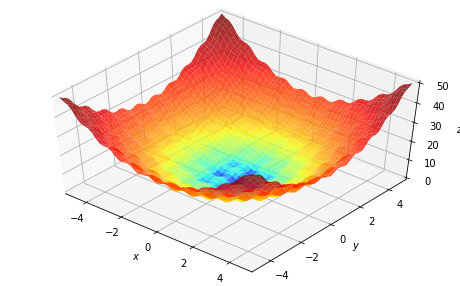

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

##SGD##

Final Point (SGD):  [[2.8223698]
 [2.8223698]]


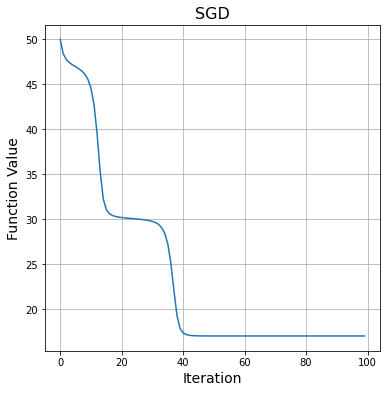

In [ ]:
epoch = 100
e_plot = np.zeros((epoch, 1))

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)

for i in range(epoch):
    opt.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt.step()
    e_plot[i] = output.detach()

print('Final Point (SGD): ', p.data.numpy())

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(e_plot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Function Value", fontsize=14)
ax.grid(True)
ax.set_title("SGD",fontsize=16)
plt.show()

##SGD with Momentum##

Final Point (SGD with Momentum):  [[-0.94695586]
 [-0.94695586]]


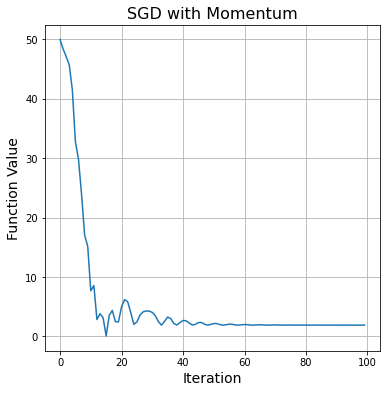

In [ ]:
epoch = 100
e_plot = np.zeros((epoch, 1))

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)

for i in range(epoch):
    opt.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt.step()
    e_plot[i] = output.detach()

print('Final Point (SGD with Momentum): ', p.data.numpy())

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(e_plot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Function Value", fontsize=14)
ax.grid(True)
ax.set_title("SGD with Momentum",fontsize=16)
plt.show()

##Adagrad##

Final Point (Adagrad):  [[4.8422885]
 [4.8422885]]


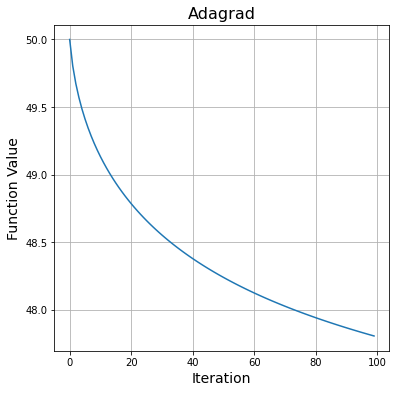

In [ ]:
epoch = 100
e_plot = np.zeros((epoch, 1))

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)

for i in range(epoch):
    opt.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt.step()
    e_plot[i] = output.detach()

print('Final Point (Adagrad): ', p.data.numpy())

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(e_plot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Function Value", fontsize=14)
ax.grid(True)
ax.set_title("Adagrad",fontsize=16)
plt.show()

##Adam##

Final Point (Adam):  [[3.9386318]
 [3.9386318]]


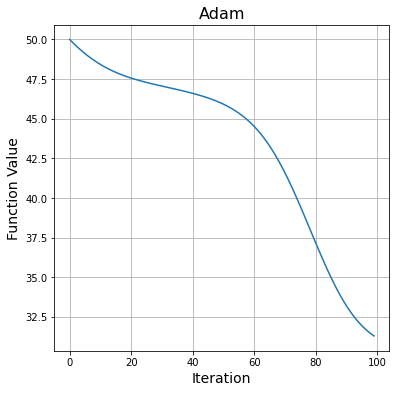

In [ ]:
epoch = 100
e_plot = np.zeros((epoch, 1))

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adam([p], lr=0.01)

for i in range(epoch):
    opt.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt.step()
    e_plot[i] = output.detach()

print('Final Point (Adam): ', p.data.numpy())

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(e_plot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Function Value", fontsize=14)
ax.grid(True)
ax.set_title("Adam",fontsize=16)
plt.show()

#Optimisation of a SVM on real data#

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df = df.sample(frac=1, random_state=0) #shuffle

df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] #filter

# add label indices column
mapping = {k: v for v, k in enumerate(df[4].unique())}
df[5] = (2 * df[4].map(mapping)) - 1 #labels in {-1, 1}

# normalise data
alldata = torch.tensor(df.iloc[:, [0,1,2,3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0)) / alldata.var(dim=0)
                                                        
# create datasets
targets_tr = torch.tensor(df.iloc[:75, 5].values, dtype=torch.long)
targets_va = torch.tensor(df.iloc[75:, 5].values, dtype=torch.long)
data_tr = alldata[:75]
data_va = alldata[75:]

from torch.utils import data
dataset = data.TensorDataset(data_tr,targets_tr) # create your datset
dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader

In [ ]:
def hinge_loss(y_pred, y_true):
  l = 1 - (y_pred * y_true)
  l[l < 0] = 0
  return torch.mean(l)

In [ ]:
def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

##SGD##

In [ ]:
epoch = 100
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)

for epoch in range(epoch):
    for batch in dataloader:
        opt.zero_grad()
        y_pred = svm(batch[0], w, b)
        loss = hinge_loss(y_pred, batch[1])
        loss.backward()
        opt.step()

y_pred = svm(data_va, w, b)
y_pred[y_pred < 0] = -1
y_pred[y_pred >= 0] = 1
print('Validation accuracy', (y_pred.int() == targets_va).float().mean().item())

Validation accuracy 0.9200000166893005


##Adam##

In [ ]:
epoch = 100

w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)

for epoch in range(epoch):
    for batch in dataloader:
        opt.zero_grad()
        y_pred = svm(batch[0], w, b)
        loss = hinge_loss(y_pred, batch[1])
        loss.backward()
        opt.step()

y_pred = svm(data_va, w, b)
y_pred[y_pred < 0] = -1
y_pred[y_pred >= 0] = 1
print('Validation accuracy', (y_pred.int() == targets_va).float().mean().item())

Validation accuracy 0.9200000166893005
